In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 1. ImageDataGenerator

In [0]:
TRAIN_DIR = './data/dogs-vs-cats-small/train'

In [3]:
train_gen = ImageDataGenerator(rescale=1./255)
train_iter = train_gen.flow_from_directory(TRAIN_DIR, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [4]:
data_batch, label_batch = next(train_iter)
print("data_batch.shape = {}, label_batch.shape = {}".format(data_batch.shape, label_batch.shape))

data_batch.shape = (20, 150, 150, 3), label_batch.shape = (20,)


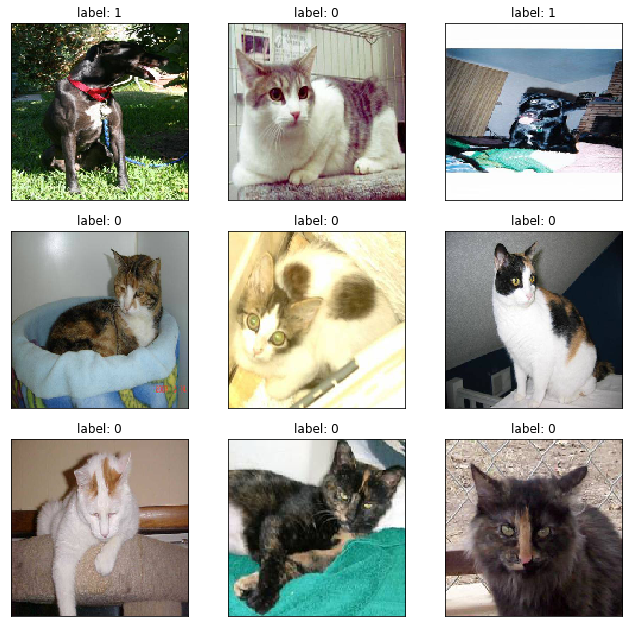

In [5]:
plt.figure(figsize=(9, 9))
for i in range(9):
    data = data_batch[i]
    label = label_batch[i]
    plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    plt.imshow(data)
    plt.title("label: {}".format(int(label)))
    plt.xticks([])
    plt.yticks([])

## 2. ImageDataGenerator with augmentation

In [6]:
image_dir = os.path.join(TRAIN_DIR, 'cats')
sample_file = os.path.join(image_dir, os.listdir(image_dir)[0])

sample_image = image.load_img(sample_file, target_size=(150, 150))
image_data = image.img_to_array(sample_image)
image_data = image_data.reshape((1, *image_data.shape))
print("image_data.shape = {}".format(image_data.shape))

image_data.shape = (1, 150, 150, 3)


In [0]:
augment_gen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

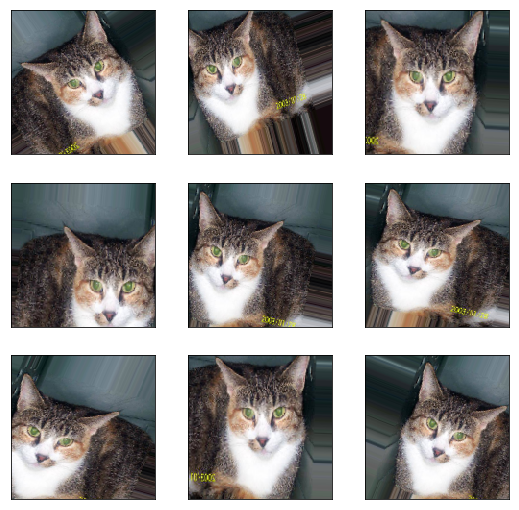

In [8]:
augment_iter = augment_gen.flow(image_data, batch_size=1)

plt.figure(figsize=(9, 9))
for i in range(9):
    batch = next(augment_iter)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.array_to_img(batch[0]))
    plt.xticks([])
    plt.yticks([])